In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/diabetes_null.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50.0,1
1,1,85.0,66.0,29,0,26.6,0.351,31.0,0
2,8,183.0,64.0,0,0,23.3,0.672,32.0,1
3,1,89.0,66.0,23,94,28.1,0.167,21.0,0
4,0,137.0,40.0,35,168,43.1,2.288,33.0,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     1
BloodPressure               1
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    1
Age                         1
Outcome                     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   767 non-null    float64
 2   BloodPressure             767 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [5]:
df1  = df.fillna(method='ffill')

In [6]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50.0,1
1,1,85.0,66.0,29,0,26.6,0.351,31.0,0
2,8,183.0,64.0,0,0,23.3,0.672,32.0,1
3,1,89.0,66.0,23,94,28.1,0.167,21.0,0
4,0,137.0,40.0,35,168,43.1,2.288,33.0,1


In [7]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df1['Outcome'].value_counts()       #class imbalance

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
df1.shape

(768, 9)

In [10]:
from sklearn.utils import resample

In [11]:
df1_out_0 = df1[df1['Outcome']==0]
df1_out_1 = df1[df1['Outcome']==1]

In [12]:
len(df1_out_0)

500

In [13]:
df1_out_1_upsampled = resample(df1_out_1, replace = True, n_samples =len(df1_out_0) - len(df1_out_1) )
df1_out_1_upsampled.shape

(232, 9)

In [14]:
df1_out_1_new = pd.concat([df1_out_1, df1_out_1_upsampled])
df1_out_1_new.shape

(500, 9)

In [15]:
#class imbalance has been fixed

In [16]:
df_new = pd.concat([df1_out_1_new, df1_out_0], ignore_index = True)       #ignore index jumbles the data which allows the model to learn better during training and testing.

In [17]:
df_new.shape

(1000, 9)

In [18]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50.0,1
1,8,183.0,64.0,0,0,23.3,0.672,32.0,1
2,0,137.0,40.0,35,168,43.1,2.288,33.0,1
3,3,78.0,50.0,32,88,31.0,0.248,26.0,1
4,2,197.0,70.0,45,543,30.5,0.158,53.0,1
...,...,...,...,...,...,...,...,...,...
995,9,89.0,62.0,0,0,22.5,0.142,33.0,0
996,10,89.0,76.0,48,180,32.9,0.171,63.0,0
997,2,122.0,70.0,27,0,36.8,0.340,27.0,0
998,5,121.0,72.0,23,112,26.2,0.245,30.0,0


In [19]:
df_new.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
df_new.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='Pregnancies'>

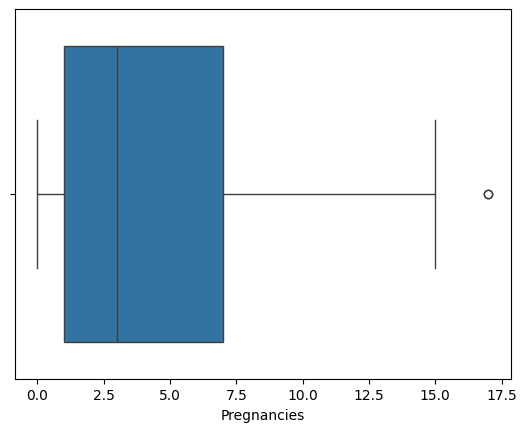

In [21]:
sns.boxplot(x = 'Pregnancies', data = df_new)

In [22]:
#no outliers

<Axes: xlabel='Glucose'>

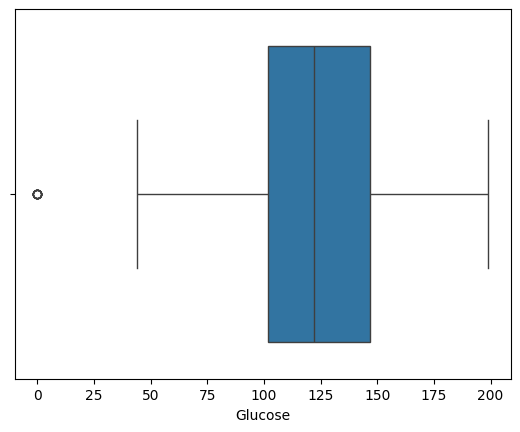

In [23]:
sns.boxplot(x ='Glucose', data = df_new)

<Axes: xlabel='BloodPressure'>

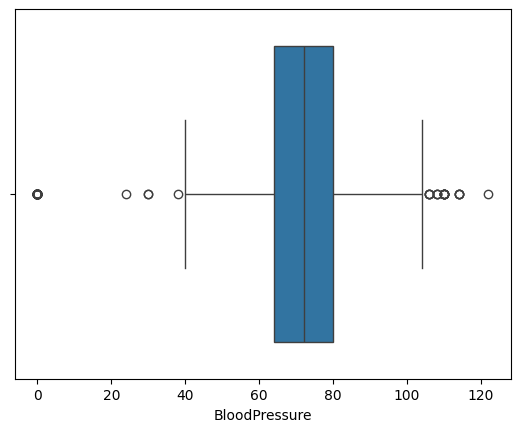

In [24]:
sns.boxplot(x = 'BloodPressure', data =df_new)

<Axes: xlabel='SkinThickness'>

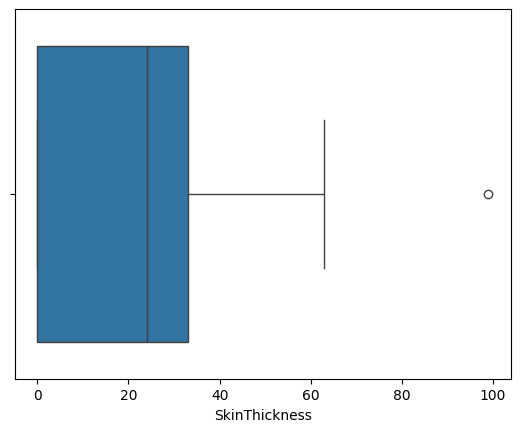

In [25]:
sns.boxplot(x = 'SkinThickness', data =df_new)

<Axes: xlabel='Insulin'>

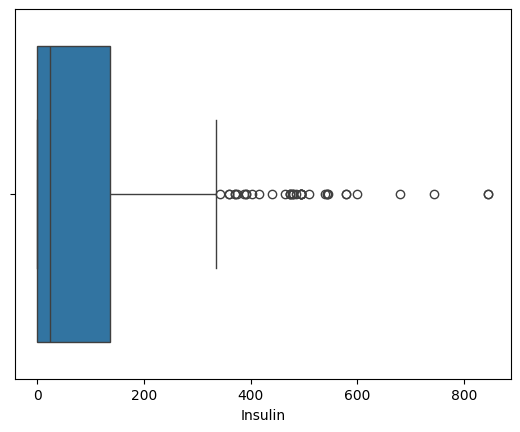

In [26]:
sns.boxplot(x = 'Insulin', data =df_new)

<Axes: xlabel='BMI'>

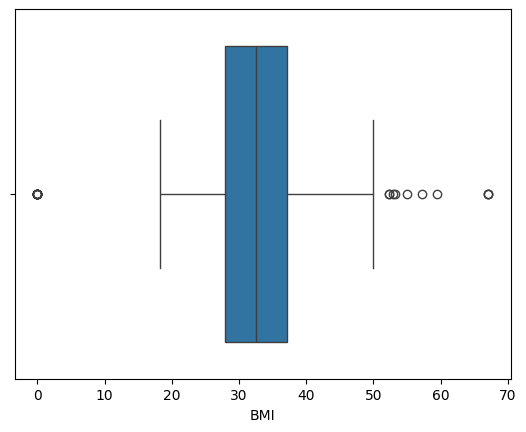

In [27]:
sns.boxplot(x = 'BMI', data =df_new)

<Axes: xlabel='DiabetesPedigreeFunction'>

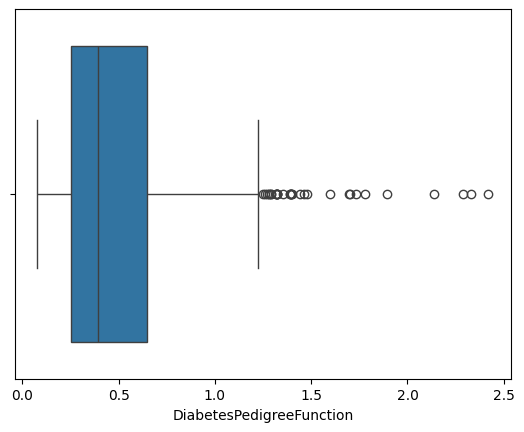

In [28]:
sns.boxplot(x = 'DiabetesPedigreeFunction', data =df_new)

<Axes: xlabel='Age'>

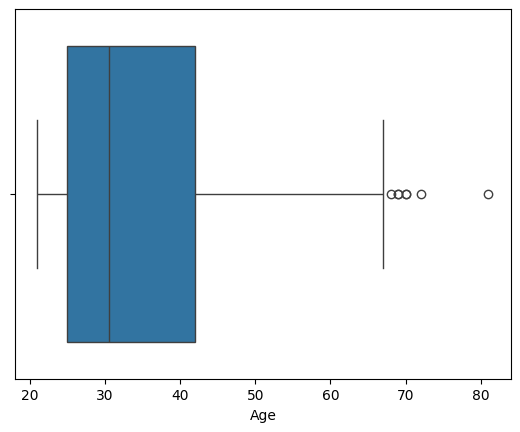

In [29]:
sns.boxplot(x = 'Age', data =df_new)

In [30]:
def remove_outliers(dfs,field):
  q1,q3 = np.percentile(dfs[field],[25,75])
  iqr = q3 - q1
  lb = q1 - 1.5*iqr
  ub = q3 + 1.5*iqr

  n_outliers = dfs[(dfs[field]>=lb)&(dfs[field]<=ub)]
  return n_outliers

In [31]:
n_outliers = remove_outliers(df_new, 'Glucose')

<Axes: title={'center': 'After removal'}, ylabel='Glucose'>

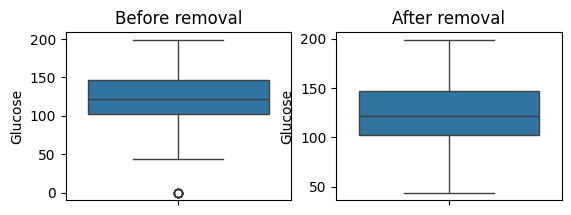

In [32]:
plt.subplot(221)
plt.title('Before removal')
sns.boxplot(df_new['Glucose'])

plt.subplot(222)
plt.title('After removal')
sns.boxplot(n_outliers['Glucose'])

In [33]:
n_outliers = remove_outliers(df_new, 'Age')

<Axes: title={'center': 'After removal'}, ylabel='Age'>

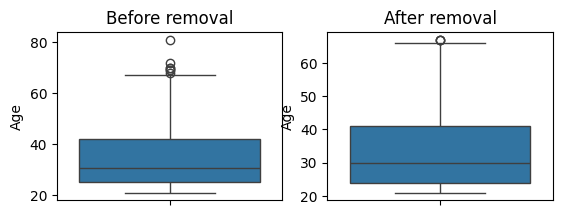

In [34]:
plt.subplot(221)
plt.title('Before removal')
sns.boxplot(df_new['Age'])

plt.subplot(222)
plt.title('After removal')
sns.boxplot(n_outliers['Age'])

In [35]:
n_outliers = remove_outliers(df_new, 'Pregnancies')

<Axes: title={'center': 'After removal'}, ylabel='Pregnancies'>

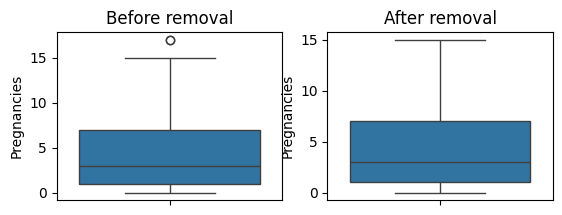

In [36]:
plt.subplot(221)
plt.title('Before removal')
sns.boxplot(df_new['Pregnancies'])

plt.subplot(222)
plt.title('After removal')
sns.boxplot(n_outliers['Pregnancies'])

In [37]:
n_outliers = remove_outliers(df_new, 'BloodPressure')

<Axes: title={'center': 'After removal'}, ylabel='BloodPressure'>

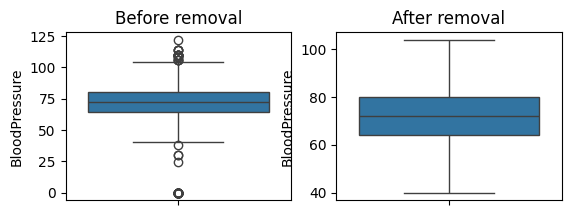

In [38]:
plt.subplot(221)
plt.title('Before removal')
sns.boxplot(df_new['BloodPressure'])

plt.subplot(222)
plt.title('After removal')
sns.boxplot(n_outliers['BloodPressure'])

In [39]:
n_outliers = remove_outliers(df_new, 'BMI')

<Axes: title={'center': 'After removal'}, ylabel='BMI'>

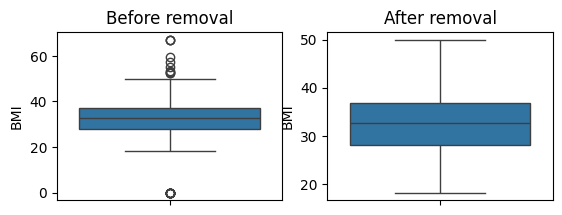

In [40]:
plt.subplot(221)
plt.title('Before removal')
sns.boxplot(df_new['BMI'])

plt.subplot(222)
plt.title('After removal')
sns.boxplot(n_outliers['BMI'])

In [41]:
n_outliers = remove_outliers(df_new, 'DiabetesPedigreeFunction')

<Axes: title={'center': 'After removal'}, ylabel='DiabetesPedigreeFunction'>

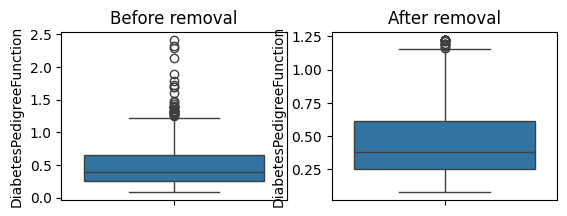

In [42]:
plt.subplot(221)
plt.title('Before removal')
sns.boxplot(df_new['DiabetesPedigreeFunction'])

plt.subplot(222)
plt.title('After removal')
sns.boxplot(n_outliers['DiabetesPedigreeFunction'])

In [43]:
n_outliers = remove_outliers(df_new, 'SkinThickness')

<Axes: title={'center': 'After removal'}, ylabel='SkinThickness'>

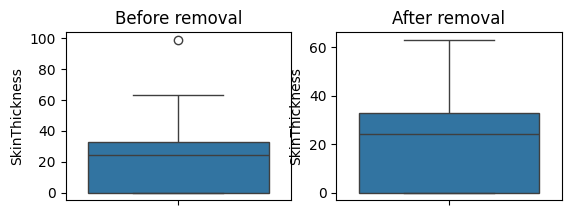

In [44]:
plt.subplot(221)
plt.title('Before removal')
sns.boxplot(df_new['SkinThickness'])

plt.subplot(222)
plt.title('After removal')
sns.boxplot(n_outliers['SkinThickness'])

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [46]:
x = df_new.drop(['Outcome'],axis =1)
y = df_new['Outcome']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [48]:
model = SVC(C=1, kernel= 'poly')

In [49]:
model.fit(x_train, y_train)    #The objective of a Linear SVC  is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data

SVC(C=1, kernel='poly')

In [50]:
y_pred = model.predict(x_test)

In [51]:
accuracy_score(y_pred, y_test)

0.69

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [53]:
lr = LogisticRegression(max_iter = 200)         #to increase no. of maximum possible iterations

In [54]:
lr.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [55]:
y_pred_lr = lr.predict(x_test)

In [56]:
accuracy_score(y_pred_lr,y_test)

0.745

In [57]:
print(classification_report(y_pred_lr, y_test))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74       100
           1       0.74      0.75      0.75       100

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200



In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [59]:
dt_gini = DecisionTreeClassifier(criterion='gini')
dt_gini.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.48272569444444446, 0.9722222222222222, 'x[1] <= 127.5\ngini = 0.5\nsamples = 800\nvalue = [401, 399]'),
 Text(0.22517361111111112, 0.9166666666666666, 'x[7] <= 28.5\ngini = 0.428\nsamples = 457\nvalue = [315, 142]'),
 Text(0.1, 0.8611111111111112, 'x[5] <= 30.95\ngini = 0.279\nsamples = 239\nvalue = [199, 40]'),
 Text(0.03333333333333333, 0.8055555555555556, 'x[0] <= 7.5\ngini = 0.047\nsamples = 125\nvalue = [122, 3]'),
 Text(0.022222222222222223, 0.75, 'x[6] <= 0.668\ngini = 0.032\nsamples = 124\nvalue = [122, 2]'),
 Text(0.011111111111111112, 0.6944444444444444, 'gini = 0.0\nsamples = 108\nvalue = [108, 0]'),
 Text(0.03333333333333333, 0.6944444444444444, 'x[6] <= 0.686\ngini = 0.219\nsamples = 16\nvalue = [14, 2]'),
 Text(0.022222222222222223, 0.6388888888888888, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.044444444444444446, 0.6388888888888888, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.044444444444444446, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),

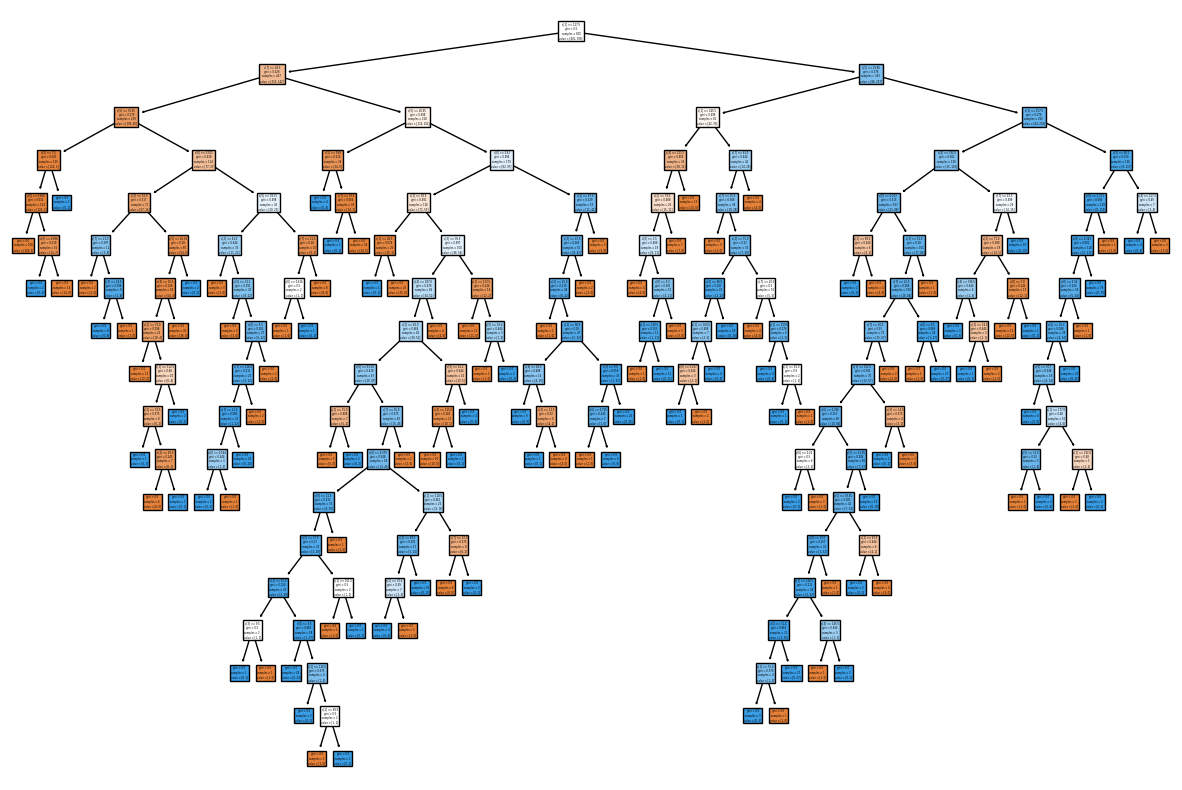

In [60]:
plt.figure(figsize=(15,10))
tree.plot_tree(dt_gini, filled = True)

In [61]:
y_pred_gini = dt_gini.predict(x_test)

In [62]:
accuracy_score(y_pred_gini, y_test)

0.795

In [63]:
print(classification_report(y_pred_gini, y_test))

              precision    recall  f1-score   support

           0       0.68      0.88      0.77        76
           1       0.91      0.74      0.82       124

    accuracy                           0.80       200
   macro avg       0.79      0.81      0.79       200
weighted avg       0.82      0.80      0.80       200



In [64]:
dt_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth =7)

In [65]:
dt_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

[Text(0.45535714285714285, 0.9375, 'x[1] <= 127.5\nentropy = 1.0\nsamples = 800\nvalue = [401, 399]'),
 Text(0.18214285714285713, 0.8125, 'x[5] <= 26.95\nentropy = 0.894\nsamples = 457\nvalue = [315, 142]'),
 Text(0.04285714285714286, 0.6875, 'x[1] <= 105.5\nentropy = 0.325\nsamples = 118\nvalue = [111, 7]'),
 Text(0.02857142857142857, 0.5625, 'entropy = 0.0\nsamples = 71\nvalue = [71, 0]'),
 Text(0.05714285714285714, 0.5625, 'x[5] <= 10.4\nentropy = 0.607\nsamples = 47\nvalue = [40, 7]'),
 Text(0.02857142857142857, 0.4375, 'x[7] <= 28.0\nentropy = 0.918\nsamples = 6\nvalue = [2, 4]'),
 Text(0.014285714285714285, 0.3125, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.04285714285714286, 0.3125, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.08571428571428572, 0.4375, 'x[1] <= 107.5\nentropy = 0.378\nsamples = 41\nvalue = [38, 3]'),
 Text(0.07142857142857142, 0.3125, 'x[2] <= 65.0\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.05714285714285714, 0.1875, 'entropy

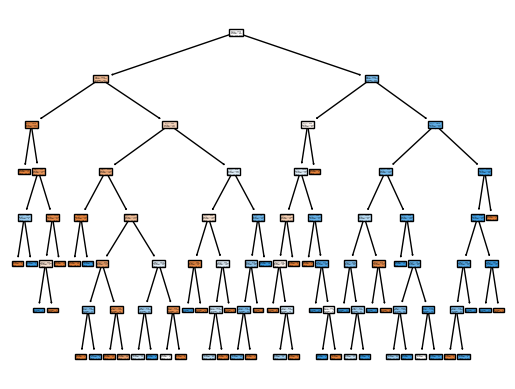

In [66]:
tree.plot_tree(dt_entropy, filled = True)

In [67]:
y_pred_ent = dt_entropy.predict(x_test)

In [68]:
accuracy_score(y_pred_ent, y_test)

0.725

In [69]:
print(classification_report(y_pred_ent, y_test))

              precision    recall  f1-score   support

           0       0.58      0.81      0.67        70
           1       0.87      0.68      0.76       130

    accuracy                           0.73       200
   macro avg       0.72      0.75      0.72       200
weighted avg       0.77      0.72      0.73       200



In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [72]:
y_pred_rfc=rfc.predict(x_test)

In [73]:
accuracy_score(y_pred_rfc,y_test)

0.88

In [74]:
print(classification_report(y_pred_rfc,y_test))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        87
           1       0.94      0.84      0.89       113

    accuracy                           0.88       200
   macro avg       0.88      0.89      0.88       200
weighted avg       0.89      0.88      0.88       200



In [75]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [76]:
rfc = RandomForestClassifier()

In [77]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [78]:
param_grid = {'n_estimators' : [10,20,30,40], 'criterion':['gini','entropy','log_loss'], 'max_depth':[2,3,4,5,None]} #n_estimator is the number of trees considered in the model.
grid_rfc = GridSearchCV(rfc, param_grid = param_grid, verbose =1, cv = 5)

In [79]:
grid_rfc.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, None],
                         'n_estimators': [10, 20, 30, 40]},
             verbose=1)

In [80]:
grid_rfc.best_params_

{'criterion': 'log_loss', 'max_depth': None, 'n_estimators': 40}

In [81]:
grid_rfc.best_score_

0.8487500000000001